# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis 

In [2]:
df = pd.read_csv('../data/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0


In [3]:
df.shape

(200, 4)

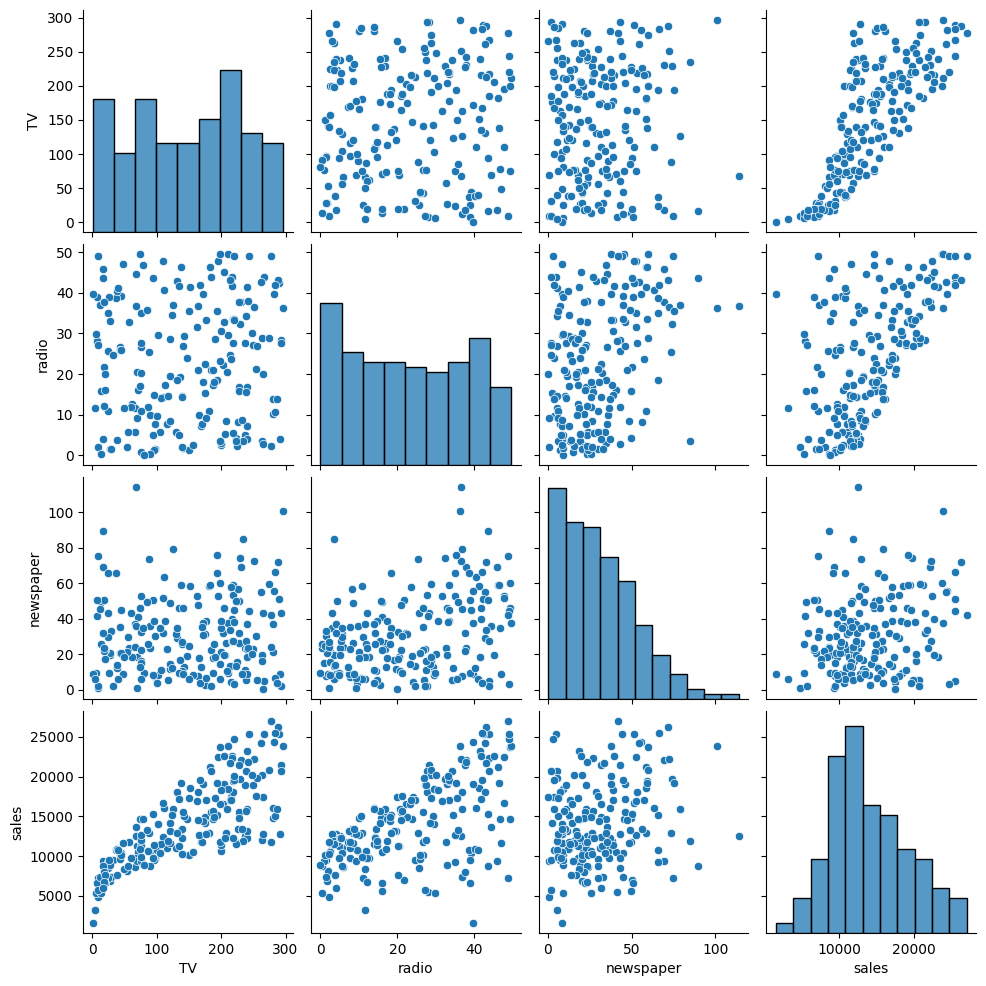

In [4]:
import seaborn as sns

sns.pairplot(df)

<AxesSubplot: >

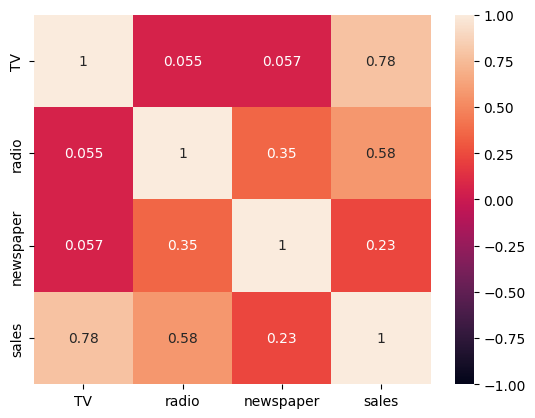

In [5]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

In [6]:
from sklearn.linear_model import LinearRegression

In [60]:
X = df.copy().drop(columns="sales")
y = df.copy()["sales"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


def train_linear_model(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)

    from sklearn import metrics
    rmse = metrics.mean_squared_error(y_test, y_hat, squared=False)
    mae = metrics.mean_absolute_error(y_test, y_hat)
    r_2 = metrics.r2_score(y_test, y_hat)

    # print(f"RMSE: {rmse:.4f}")
    # print(f"MAE: {mae:.4f}")
    # print(f"R2: {r_2:.4f}")

    return model, y_hat, mae, r_2

In [61]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

alpha_lasso = 5000
alpha_ridge = 5000

d_models = {"Linear": LinearRegression(), 
            "Ridge": Ridge(alpha=alpha_ridge), 
            "Lasso": Lasso(alpha=alpha_lasso)}

d_trained_models = d_models.copy()

for name, model in d_models.items():
    print("\n\n", name, "\n")
    trained_model, _ = train_linear_model(X_train, y_train, X_test, y_test, model)
    d_trained_models.update({name: model})





 Linear 



ValueError: too many values to unpack (expected 2)

In [10]:
np.linspace(1, 10000, 50)

array([1.00000000e+00, 2.05061224e+02, 4.09122449e+02, 6.13183673e+02,
       8.17244898e+02, 1.02130612e+03, 1.22536735e+03, 1.42942857e+03,
       1.63348980e+03, 1.83755102e+03, 2.04161224e+03, 2.24567347e+03,
       2.44973469e+03, 2.65379592e+03, 2.85785714e+03, 3.06191837e+03,
       3.26597959e+03, 3.47004082e+03, 3.67410204e+03, 3.87816327e+03,
       4.08222449e+03, 4.28628571e+03, 4.49034694e+03, 4.69440816e+03,
       4.89846939e+03, 5.10253061e+03, 5.30659184e+03, 5.51065306e+03,
       5.71471429e+03, 5.91877551e+03, 6.12283673e+03, 6.32689796e+03,
       6.53095918e+03, 6.73502041e+03, 6.93908163e+03, 7.14314286e+03,
       7.34720408e+03, 7.55126531e+03, 7.75532653e+03, 7.95938776e+03,
       8.16344898e+03, 8.36751020e+03, 8.57157143e+03, 8.77563265e+03,
       8.97969388e+03, 9.18375510e+03, 9.38781633e+03, 9.59187755e+03,
       9.79593878e+03, 1.00000000e+04])

In [62]:
# alpha_lasso = np.logspace(-2, 4, 20)
alpha_lasso = 1000
model_lasso = Lasso(alpha=alpha_lasso)

model_lasso, y_hat, mae, r_2 = train_linear_model(X_train, y_train, X_test, y_test, model_lasso)

In [72]:
# alpha_lasso = np.logspace(-2, 4, 20)
alpha_lasso = np.logspace(-2, 1, 1000)

ls_mae_lasso = []
ls_r_2_lasso = []
for alpha in alpha_lasso:
    model_lasso = Lasso(alpha=alpha)

    model_lasso, y_hat, mae, r_2 = train_linear_model(X_train, y_train, X_test, y_test, model_lasso);

    ls_mae_lasso.append(mae)
    ls_r_2_lasso.append(r_2)

In [73]:
np.min(ls_mae_lasso)

1361.7828462828547

In [74]:
idx = np.argmin(ls_mae_lasso)
alpha_lasso[idx]

0.01

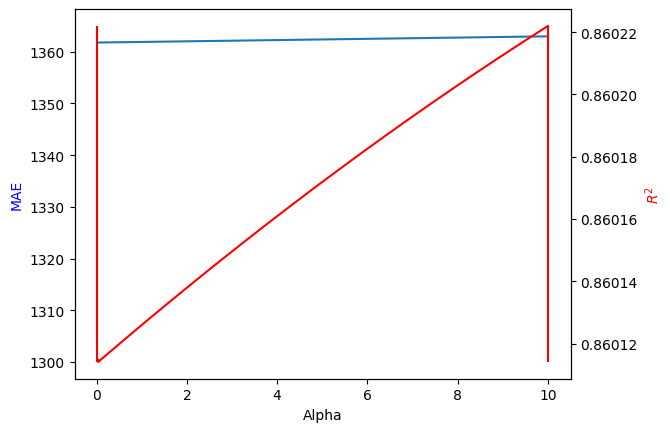

In [75]:
fig, axes = plt.subplots()

plt.plot(alpha_lasso, ls_mae_lasso)
plt.vlines(alpha_lasso[np.argmax(ls_r_2_lasso)], ymin=1300, ymax=1365, colors="r")
plt.vlines(alpha_lasso[np.argmin(ls_mae_lasso)], ymin=1300, ymax=1365, colors="r")
axes.set_xlabel('Alpha')
axes.set_ylabel('MAE', color='b')

twin_axes = axes.twinx()
twin_axes.plot(alpha_lasso, ls_r_2_lasso, 'r')
twin_axes.set_ylabel('$R^2$', color='r')

plt.show()

In [47]:
def train_linear_model(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)

    from sklearn import metrics
    rmse = metrics.mean_squared_error(y_test, y_hat, squared=False)
    mae = metrics.mean_absolute_error(y_test, y_hat)
    r_2 = metrics.r2_score(y_test, y_hat)

    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2: {r_2:.4f}")

    return model, y_hat, mae, r_2

In [48]:
alpha_lasso_mae = alpha_lasso[np.argmin(ls_mae_lasso)]
alpha_lasso_r_2 = alpha_lasso[np.argmax(ls_r_2_lasso)]

alpha_lasso_opt = (alpha_lasso_mae + alpha_lasso_r_2) / 2
alpha_lasso_opt

6513.350300518923

In [106]:
lin_mod = LinearRegression()
lin_mod, y_hat, mae, r_2 = train_linear_model(X_train, y_train, X_test, y_test, lin_mod)

In [59]:
X.describe()

,TV,radio,newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


In [101]:
df_coef = pd.DataFrame(lin_mod.coef_, index=X_train.columns)
df_coef.columns = ["Coefs"]
df_coef

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<AxesSubplot: >

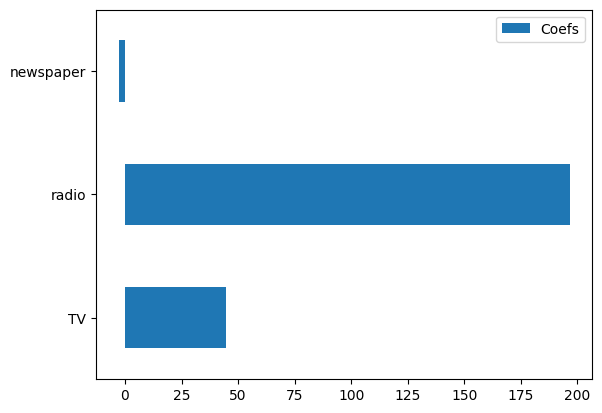

In [102]:
df_coef.plot(kind="barh")

In [50]:
model_lasso = Lasso(alpha=alpha_lasso_opt)
model_lasso, y_hat, mae, r_2 = train_linear_model(X_train, y_train, X_test, y_test, model_lasso)


RMSE: 2054.5170
MAE: 1339.3844
R2: 0.8659


In [76]:
X_train.shape

(160, 3)

In [94]:
from sklearn.model_selection import GridSearchCV

model = ElasticNet()

d_params = {'alpha': np.logspace(-2, 2, 1000),
            'l1_ratio': np.linspace(.1, 1, 10)}

cv_search = GridSearchCV(model, d_params, scoring=['neg_mean_absolute_error', 'r2'], cv=4, refit=False)

In [95]:
cv_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-02, 1.00926219e-02, 1.01861017e-02, 1.02804473e-02,
       1.03756668e-02, 1.04717682e-02, 1.05687597e-02, 1.06666496e-02,
       1.07654461e-02, 1.08651577e-02, 1.09657929e-02, 1.10673602e-02,
       1.11698682e-02, 1.12733256e-02, 1.13777413e-02, 1.14831241e-02,
       1.15894830e-02, 1.16968270e-02, 1.18051653e-...
       8.70843150e+01, 8.78909065e+01, 8.87049689e+01, 8.95265713e+01,
       9.03557835e+01, 9.11926760e+01, 9.20373200e+01, 9.28897872e+01,
       9.37501502e+01, 9.46184819e+01, 9.54948564e+01, 9.63793480e+01,
       9.72720319e+01, 9.81729841e+01, 9.90822810e+01, 1.00000000e+02]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             refit=False, scoring=['neg_mean_absolute_error', 'r2'])

In [96]:
df_results = pd.DataFrame(cv_search.cv_results_)
df_results.to_csv("results.csv", index=False, sep=";", decimal=",")

In [97]:
df_results[df_results["mean_test_neg_mean_absolute_error"] == df_results["mean_test_neg_mean_absolute_error"].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,...,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,mean_test_r2,std_test_r2,rank_test_r2
8689,0.0,0.0,0.000498,0.000499,29.886529,1.0,"{'alpha': 29.886528735503827, 'l1_ratio': 1.0}",-840.131109,-1333.469062,-1287.202894,...,-1237.719921,241.545662,1,0.927704,0.869127,0.919468,0.878853,0.898788,0.025204,132


In [89]:
from sklearn import metrics

In [100]:
model = ElasticNet(**{'alpha': 29.886528735503827, 'l1_ratio': 1.0})
model.fit(X_train, y_train)

y_hat = model.predict(X_test)
print(metrics.mean_absolute_error(y_test, y_hat))
print(metrics.r2_score(y_test, y_hat))


1366.1024248736146
0.8603406002898225


<AxesSubplot: >

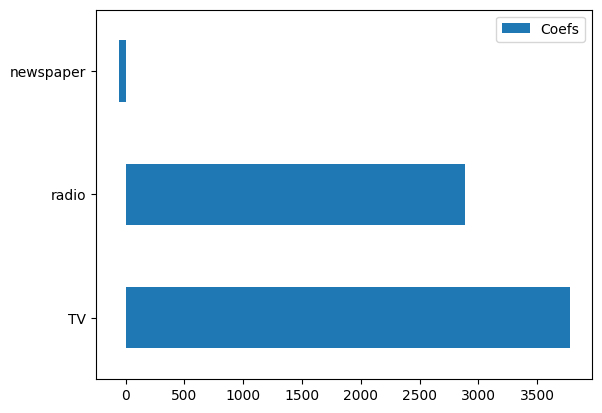

In [107]:
df_coef = pd.DataFrame(lin_mod.coef_, index=X.columns)
df_coef.columns = ["Coefs"]
df_coef.plot(kind="barh")

<AxesSubplot: >

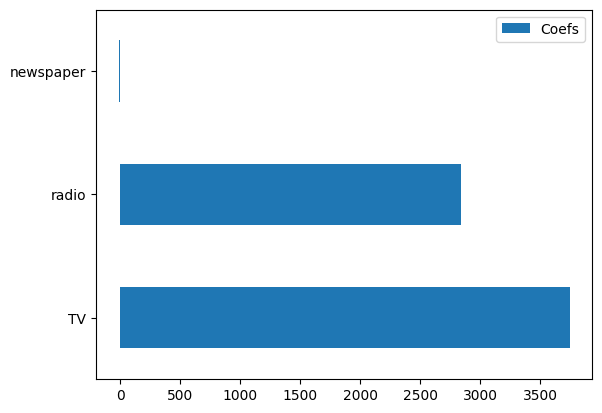

In [104]:
df_coef = pd.DataFrame(model.coef_, index=X.columns)
df_coef.columns = ["Coefs"]
df_coef.plot(kind="barh")

In [112]:
model = Ridge(alpha=10)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)
print(metrics.mean_absolute_error(y_test, y_hat))
print(metrics.r2_score(y_test, y_hat))


1364.0791436140569
0.8559035947855222


<AxesSubplot: >

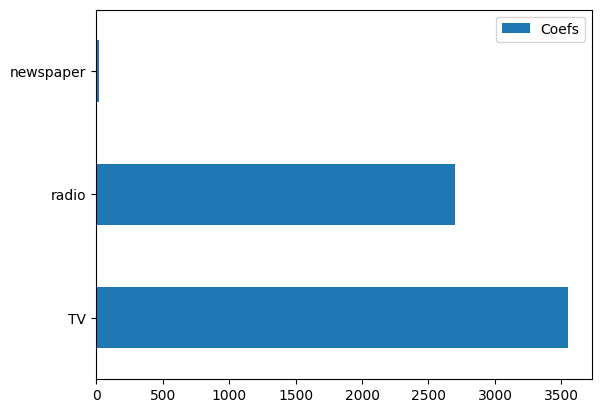

In [113]:
df_coef = pd.DataFrame(model.coef_, index=X.columns)
df_coef.columns = ["Coefs"]
df_coef.plot(kind="barh")